In [27]:
# IRIS Project Agenda

### data loading

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('/content/IRIS.csv')

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
df.shape

(150, 5)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [34]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [35]:
counter = df.species.value_counts()
counter

,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


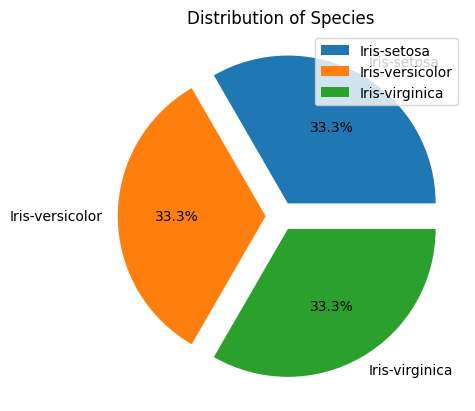

In [36]:
import matplotlib.pyplot as plt
plt.pie(counter, labels = df['species'].unique(), autopct='%1.1f%%', explode=(.1,.1,.1))
plt.title('Distribution of Species')
plt.legend()
plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [38]:
df['species']

,species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [39]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: species, Length: 150, dtype: int64)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [41]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
SVC = GridSearchCV(SVC(), param_grid, verbose = 1)

In [43]:
SVC.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [44]:
SVC.best_params_

{'C': 10, 'gamma': 0.01}

In [45]:
y_pred = SVC.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

0.9666666666666667

<Axes: >

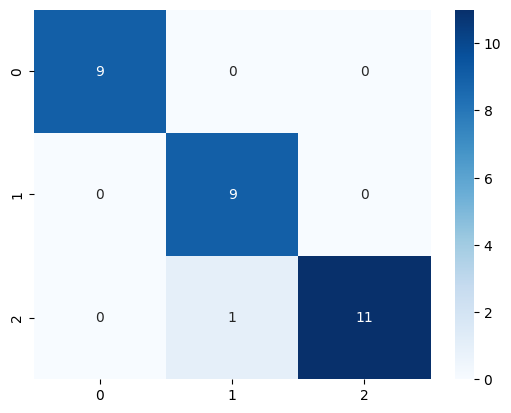

In [47]:
import seaborn as sns
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, cmap='Blues')

In [48]:
prediction = SVC.predict([[4.9,3.0,1.4,0.2]])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [49]:
decode_label = le.inverse_transform(prediction)
decode_label

array(['Iris-setosa'], dtype=object)

In [50]:
import pickle
with open('iris_Model.pkl', 'wb') as file:
    pickle.dump(SVC, file)

In [51]:
# Load the model from the pickle file
with open('iris_Model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [52]:
prediction = loaded_model.predict([[4.9,3.0,1.4,0.2]])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])